In [1]:
import numpy as np
from matplotlib import pyplot as plt
from euler_cromer import simulate

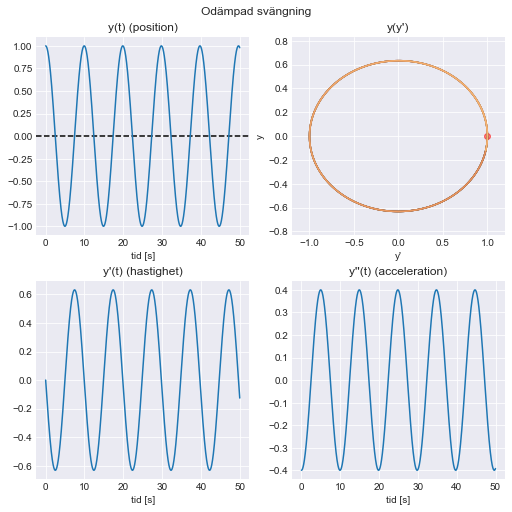

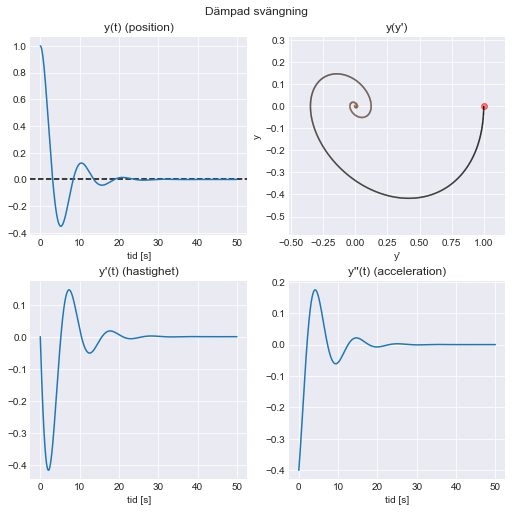

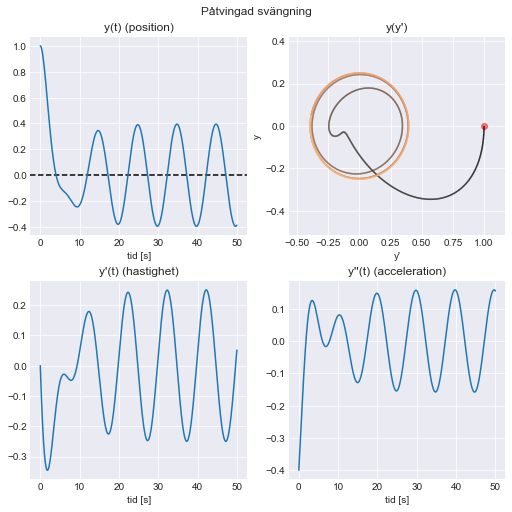

In [12]:
k = 0.4   # fjäderkonstant
r = 0.4   # dämpningskonstant
m = 1     # massa
# påtvingande kraft
def F(t): 
    w = np.sqrt(k/m) # bäst vinkelhastighet
    return 0.1 * np.sin(w*t)

def undamped(y, v, t):
    return (-k*y) / m
def damped(y, v, t):
    return (-k*y - r*v) / m
def driven_damped(y, v, t):
    return (-k*y - r*v + F(t)) / m

y0, v0 = 1, 0
initial = [y0, v0]
dt, from_time, max_time = 0.01, 0, 50
sol_undamped = simulate(undamped, initial, dt, from_time, max_time, title='Odämpad svängning', method='euler-cromer')
sol_damped = simulate(damped, initial, dt, from_time, max_time, title='Dämpad svängning')
sol_driven_damped = simulate(driven_damped, initial, dt, from_time, max_time, title='Påtvingad svängning')

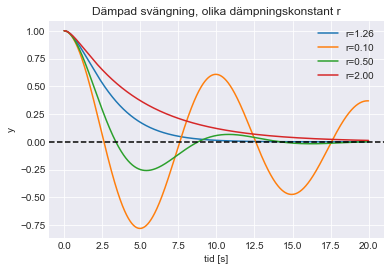

In [3]:
r_critical = np.sqrt(4*k*m)
for r in [r_critical, 0.1, 0.5, 2]:
    sol = simulate(damped, initial=[1, 0], dt=0.01, to_time=20, plot=False)
    plt.plot(sol['t'], sol['y'], label=f'r={r:.2f}')
plt.legend()
plt.title('Dämpad svängning, olika dämpningskonstant r')
plt.xlabel('tid [s]'); plt.ylabel('y')
plt.axhline(0, color='k', linestyle='--')

### Extrauppgift 1

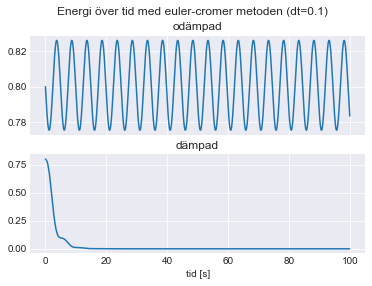

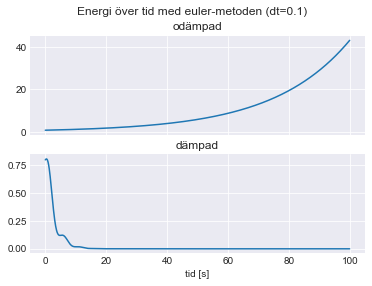

Text(0, 0.5, 'E_max - E_min')

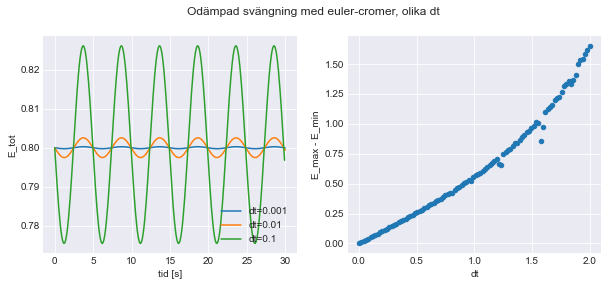

In [15]:
def E_tot(delta_y, v):
    return 0.5*m*v**2 + 0.5*k*delta_y**2

def plot_energy(damped, undamped, title=''):
    time = damped['t']
    fig, [ax1, ax2] = plt.subplots(2, 1, sharex=True)
    fig.suptitle(title)
    ax1.plot(time, E_tot(undamped['y'], undamped['y_prime']))
    ax1.set_title('odämpad')
    ax2.plot(time, E_tot(damped['y'], damped['y_prime']))
    ax2.set_title('dämpad')
    ax2.set_xlabel('tid [s]')
    plt.show()

initial, dt, from_time, to_time = [2, 0], 0.1, 0, 100
undamped_eulercromer = simulate(undamped, initial, dt, from_time, to_time, plot=False, method='euler-cromer')
damped_eulercromer = simulate(damped, initial, dt, from_time, to_time, plot=False, method='euler-cromer')
undamped_euler = simulate(undamped, initial, dt, from_time, to_time, plot=False, method='euler')
damped_euler = simulate(damped, initial, dt, from_time, to_time, plot=False, method='euler')
plot_energy(damped_eulercromer, undamped_eulercromer, title='Energi över tid med euler-cromer metoden (dt=0.1)')
plot_energy(damped_euler, undamped_euler, title='Energi över tid med euler-metoden (dt=0.1)')

# Jämför olika värden på dt
fig, axs = plt.subplots(1, 2, figsize=(10,4))
fig.suptitle('Odämpad svängning med euler-cromer, olika dt')
for dt in [0.001, 0.01, 0.1]:
    sol = simulate(undamped, initial, dt, from_time, to_time=30, plot=False)
    energy = E_tot(sol['y'], sol['y_prime'])
    axs[0].plot(sol['t'], energy, label=f'dt={dt}')
dts, energy_spans = np.linspace(0.001, 2, 100), []
for dt in dts: 
    sol = simulate(undamped, initial, dt, from_time, to_time=30, plot=False)
    energy = E_tot(sol['y'], sol['y_prime'])
    energy_spans.append(np.max(energy) - np.min(energy))
axs[0].legend()
axs[0].set_xlabel('tid [s]'); axs[0].set_ylabel('E_tot')
axs[1].scatter(dts, energy_spans, s=20)
axs[1].set_xlabel('dt'); axs[1].set_ylabel('E_max - E_min')